,4h_timestamp,4h_open,4h_high,4h_low,4h_close,4h_volume,percentage_change
0,1627747200000,41547.21,41580.26,41040.89,41309.85,7.444235,NaN
1,1627761600000,41309.85,41978.92,41165.00,41447.67,23.019513,0.333625
2,1627776000000,41447.67,42566.00,41146.99,42438.76,16.965873,2.391184
3,1627790400000,42438.76,42438.76,41613.32,41696.27,13.860199,-1.749556
4,1627804800000,41696.27,41939.99,41323.80,41581.70,15.844612,-0.274773
...,...,...,...,...,...,...,...
3795,1682654400000,29418.96,29564.19,29401.21,29485.26,879.406954,0.225365
3796,1682668800000,29485.26,29489.93,29122.73,29242.21,1195.784423,-0.824310
3797,1682683200000,29242.21,29467.36,28891.27,29149.35,2023.027122,-0.317555
3798,1682697600000,29149.35,29433.32,29105.20,29323.56,1098.675741,0.597646


Number of instances with a price change of 0.2% or more: 2869 instances
Percentage of the total: 75.50%


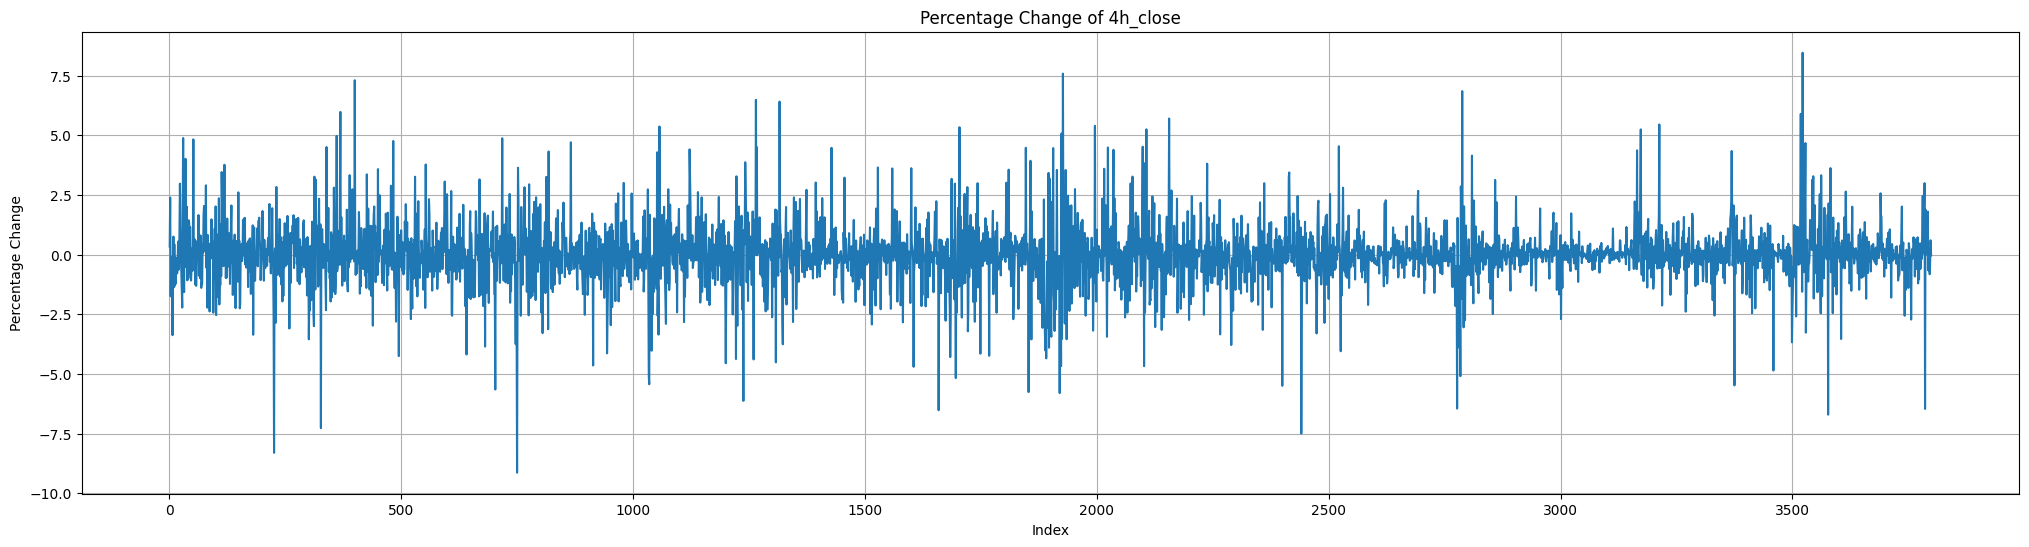

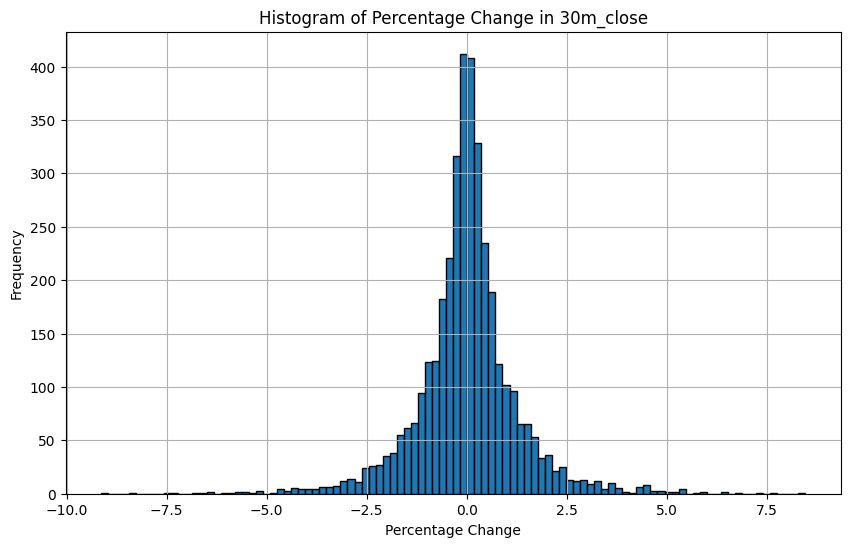

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

target_preiod = '4h'
df = pd.read_csv(f'data/BTCUSDT_{target_preiod}_20210801_20230331.csv')
df['percentage_change'] = df[f'{target_preiod}_close'].pct_change() * 100
display(df)

# Extract rows where the absolute value of percentage change is greater than or equal to 0.2
change_0_2_or_more = df[abs(df['percentage_change']) >= 0.2]
# Calculate the percentage of these rows in the whole dataframe by dividing the number of extracted rows by the total number of rows
percentage_of_total = len(change_0_2_or_more) / len(df) * 100
print(f"Number of instances with a price change of 0.2% or more: {len(change_0_2_or_more)} instances")
print(f"Percentage of the total: {percentage_of_total:.2f}%")


plt.figure(figsize=(25,6))
plt.plot(df['percentage_change'])
plt.title(f'Percentage Change of {target_preiod}_close')
plt.xlabel('Index')
plt.ylabel('Percentage Change')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.hist(df['percentage_change'], bins=100, edgecolor='black') # binsを100に設定
plt.title('Histogram of Percentage Change in 30m_close')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
